# Quest 9. Linear Regression

## Import CSV and Compose X and Y

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression as linreg
from scipy.stats import linregress

In [2]:
df = pd.read_csv("./q9data.csv", names=["y", "x"])

In [3]:
Y_skl = np.asarray(df["y"].tolist()).reshape(-1, 1)
X_skl = np.asarray(df["x"].tolist()).reshape(-1, 1)
Y_sci = df["y"].tolist()
X_sci = df["x"].tolist()

## Computational Using Scikit Learn

In [4]:
lin_reg = linreg()
reg = lin_reg.fit(X_skl,Y_skl)

m_skl = reg.coef_
b_skl = reg.intercept_

print("m_skl: {}, m_skl: {}".format(m_skl[0][0], b_skl[0]))

m_skl: 0.23872348094631837, m_skl: -0.2761803298869634


In [5]:
m_sci, b_sci, r_sci, p_sci, std_sci = linregress(X_sci, Y_sci)

print("m_sci: {}, b_sci: {}".format(m_sci, b_sci))

m_sci: 0.23872348094631846, b_sci: -0.2761803298869643


## Gradient Descent

In [6]:
def step_gradient(b_current, m_current, points, learning_rate):
    N = len(points)
    m_gradient = sum([-x*(y-(m_current*x+b_current)) for x,y in points])*(2/N)
    b_gradient = sum([-1*(y-(m_current*x+b_current)) for x,y in points])*(2/N)
    new_m = m_current - (m_gradient * learning_rate)
    new_b = b_current - (b_gradient * learning_rate)
    return [new_b, new_m]

def gradient_descent_runner(starting_b, starting_m, points, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]

To find optimal initial point to start, I took a straight line between starting point and ending point as initial slope. For initial intercept, I checked if there were any value that was close to 0, and had the y value at that index = b.

In [7]:
# Run the code below to get the optimal starting b, at Y_sci[51]
# for i in X_sci:
#     if i > -0.5 and i < 0.5:
#         print(i)
#         print(X_sci.index(i))


m_i = (Y_sci[len(Y_sci)-1] - Y_sci[0])/(X_sci[len(X_sci)-1] - X_sci[0])
b_i = Y_sci[51]

print(m_i, b_i)

0.2153492955965512 0.06488205326977113


In [8]:
points = list(zip(Y_sci, X_sci))

This is if I have rather large learning rate (steps)

In [9]:
b_gd, m_gd = gradient_descent_runner(b_i, m_i, points, 0.001, 1000)
print("m_gd: {}, b_gd: {}".format(m_gd, b_gd))

m_gd: 4.002335281777339, b_gd: 1.5242982057056518


This is if I have very small learning rate

In [10]:
b_gd, m_gd = gradient_descent_runner(b_i, m_i, points, 0.000000001, 1000)
print("m_gd: {}, b_gd: {}".format(m_gd, b_gd))

m_gd: 0.21539553815587845, b_gd: 0.06489987882107316


Now, to my optimal value.

In [11]:
b_gd, m_gd = gradient_descent_runner(b_i, m_i, points, 0.0000004925, 1000)
print("m_gd: {}, b_gd: {}".format(m_gd, b_gd))

m_gd: 0.2380556161390824, b_gd: 0.07363486997903128


I can see that by having extremely small learning rate my m and b values will converge to my starting m and b values. with large learning rate, it just grows. This is especially true for m. I predict this is from having x in the calculation function for m, resulting it to have larger scalar value compared to b which only contains -1.

Also, since the value converges to the initial at best and does not go below that, the only way to come up with a close estimate is if I alter the initial b to start at negative value. B value will never decrement from the initial value and only increase. Therefore without altering the original function from class, the only way to get close to the target value is if I start below the target B value.

In [12]:
# For instance, if I use this, I can almost exactly overlap my line with the scipy line.
# b_gd, m_gd = gradient_descent_runner(-0.2848, m_i, points, 0.0000004925, 1000)

## Plot

In [13]:
from matplotlib import pyplot as plt

In [14]:
def line_from_mb(slope, intercept, linetype, color):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, linetype, color=color)

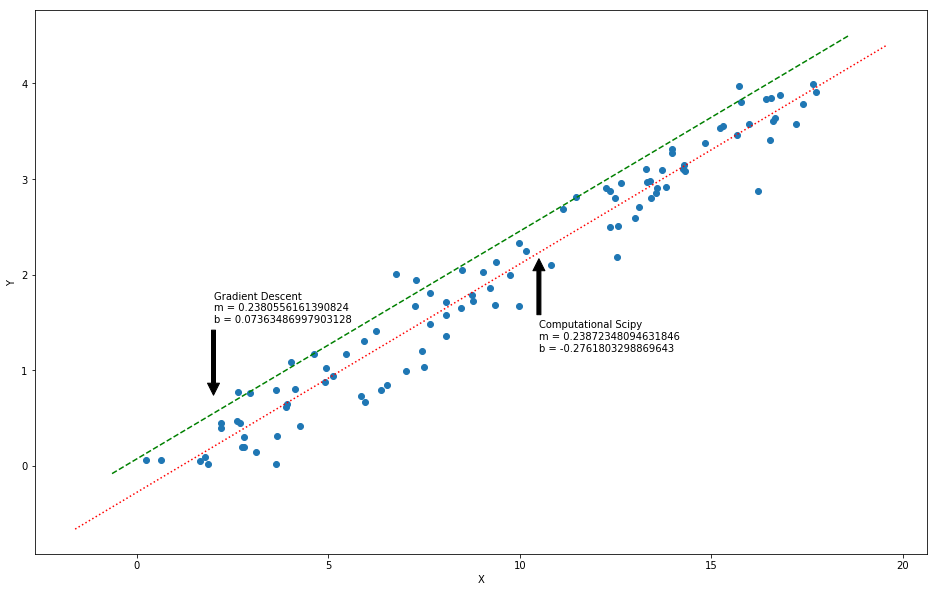

In [15]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X_sci, Y_sci)
line_from_mb(m_gd, b_gd, '--', 'g')
ax.annotate('Gradient Descent\nm = 0.2380556161390824\nb = 0.07363486997903128', 
            xy=(2, 0.7), xytext=(2, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
line_from_mb(m_sci, b_sci, ':', 'r')
ax.annotate('Computational Scipy\nm = 0.23872348094631846\nb = -0.2761803298869643', 
            xy=(10.5, 2.2), xytext=(10.5, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.show()